<a href="https://colab.research.google.com/github/omkar1872/Machine-Learning-Projects/blob/main/Crop_Recommendation_Major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Loading Dataset into Pandas DataFrame

In [186]:
df=pd.read_csv("/content/Crop_recommendation.csv")

In [187]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [188]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


Extracting Features and Target from the Dataset



In [189]:
x = df.iloc[:, 0:7]
y = df.iloc[:,7]
X = df.drop(columns=['label'])
y = df['label']

In [190]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [191]:
y.head()

,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [192]:
print(df.shape)

(2200, 8)


In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1474, 7)
x_test : (726, 7)
y_train : (1474,)
y_test : (726,)


In [194]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Model Training with LogisticRegression

In [195]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
# Predict on training and testing sets for
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
report=classification_report(y_test,test_preds)
print(report)
# Print results
print(f"Training Accuracy of Logistic Regression: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy of Logistic Regression: {test_accuracy * 100:.2f}%")

*Confusion Matrix for RF: 
[[38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 38  0  0  0  0  0  0  0  0]
 [ 0  0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Training with Decision Tree

In [196]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
# Predict on training and testing sets for
train_preds = DT.predict(x_train)
test_preds = DT.predict(x_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
report=classification_report(y_test,test_preds)
print(report)


# Print results
print(f"Training Accuracy of Decision Tree: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy of Decision Tree: {test_accuracy * 100:.2f}%")


*Confusion Matrix for RF: 
[[38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  1  0  0 35  0  0  0  0  0  0  0  0]
 [ 0  0

Model Training with RandomForest

In [197]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
# Predict on training and testing sets for
train_preds = RF.predict(x_train)
test_preds = RF.predict(x_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
report=classification_report(y_test,test_preds)
print(report)
# Print results
print(f"Training Accuracy of RandomForest: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy of RandomForest: {test_accuracy * 100:.2f}%")

*Confusion Matrix for RF: 
[[38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 38  0  0  0  0  0  0  0  0]
 [ 0  0

Model training with KNN

In [198]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train,y_train)
predictions = neigh.predict(x_test)
# Predict on training and testing sets for
train_preds = neigh.predict(x_train)
test_preds = neigh.predict(x_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
report=classification_report(y_test,test_preds)
print(report)

# Print results
print(f"Training Accuracy of KNN: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy of KNN: {test_accuracy * 100:.2f}%")

*Confusion Matrix for RF: 
[[38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 36  0  0  0  0  0  0  0  0]
 [ 0  0

Model Training with Naive Bayes

In [199]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
predictions = gaussian.predict(x_test)
# Predict on training and testing sets for
train_preds = gaussian.predict(x_train)
test_preds = gaussian.predict(x_test)
# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
report=classification_report(y_test,test_preds)
print(report)

# Print results
print(f"Training Accuracy of Gaussion: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy of Gaussion: {test_accuracy * 100:.2f}%")

*Confusion Matrix for RF: 
[[38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 38  0  0  0  0  0  0  0  0]
 [ 0  0

Making a Prediction for a New Crop Input

In [200]:
new=np.array([[32,14,37,22.73031253,88.48567856,6.825256236,104.6843243]])
predicted_crop=model.predict(new)
print("pridicted_crop is: ",predicted_crop)

pridicted_crop is:  ['pomegranate']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Visualizing Training and Testing Accuracy of Different Machine Learning Models

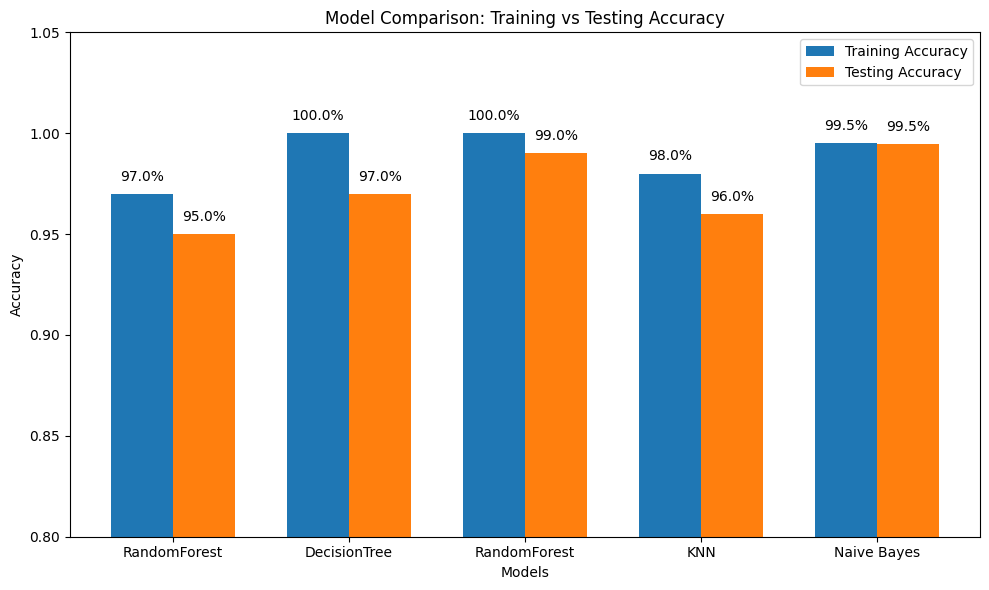

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
model_names = ['RandomForest', 'DecisionTree', 'RandomForest', 'KNN','Naive Bayes']
train_accuracies = [0.97, 1.0, 1.0, 0.98,0.9953]
test_accuracies = [0.95, 0.97, 0.99, 0.96,0.9945]

# Bar positions
x = np.arange(len(model_names))
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
bars2 = plt.bar(x + width/2, test_accuracies, width, label='Testing Accuracy')

# Add percentage labels on top of bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.1f}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.1f}%', ha='center', va='bottom')

# Formatting
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Comparison: Training vs Testing Accuracy')
plt.xticks(x, model_names)
plt.ylim(0.8, 1.05)
plt.legend()
plt.tight_layout()
plt.show()
